<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#데이터에-관한-설명" data-toc-modified-id="데이터에-관한-설명-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>데이터에 관한 설명</a></span></li><li><span><a href="#데이터와-필요한-라이브러리-불러오기" data-toc-modified-id="데이터와-필요한-라이브러리-불러오기-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>데이터와 필요한 라이브러리 불러오기</a></span></li><li><span><a href="#칼럼-내용-인지하고-데이터-전처리하기" data-toc-modified-id="칼럼-내용-인지하고-데이터-전처리하기-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>칼럼 내용 인지하고 데이터 전처리하기</a></span></li><li><span><a href="#조사자들의-기본-정보-전처리-및-시각화하기" data-toc-modified-id="조사자들의-기본-정보-전처리-및-시각화하기-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>조사자들의 기본 정보 전처리 및 시각화하기</a></span></li></ul></div>

## 데이터에 관한 설명

본 조사의 목적은 국민의 건강수준, 건강행태, 식품 및 영양섭취 실태에 대한 국가 단위의 대표성과 신뢰성을 갖춘 통계를 산출하고, 이를 통해 국민건강증진종합계획의 목표 설정 및 평가, 건강증진 프로그램 개발 등 보건정책의 기초자료로 활용하는 것이다.

## 데이터와 필요한 라이브러리 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 모든 열 보이도록 설정하기.
pd.options.display.max_columns = None 

# 한글 깨짐 방지하기.
import matplotlib.font_manager as fm
plt.rc('font', family='Malgun Gothic')

# 마이너스 깨짐 방지하기.
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# font_manager를 이용하여 글꼴 이름 반환하기
fm.FontProperties().get_name()

'Malgun Gothic'

In [3]:
# ttflist를 doc에서 찾지 못 함
import matplotlib.font_manager as fm
f = [f.name for f in fm.fontManager.ttflist]
print(f[:5]) # 5개만 출력하기

['DejaVu Serif', 'STIXSizeOneSym', 'cmss10', 'STIXSizeThreeSym', 'cmmi10']


In [4]:
df=pd.read_csv("./nationalhealth_2010to2021.csv")
df.shape

(35629, 122)

In [5]:
df.head()

,ID,ID_fam,year,region,town_t,sex,age,incm,ho_incm,incm5,ho_incm5,edu,occp,cfam,genertn,allownc,marri_1,marri_2,fam_rela,tins,D_1_1,educ,EC1_1,EC_wht_23,EC_wht_5,EC_pedu_1,EC_pedu_2,BD1_11,BD2_1,BD2_31,dr_month,BP6_10,BP7,mh_stress,BS3_1,BE3_31,BE5_1,LW_mt,LW_mt_a1,LW_br,HE_fst,HE_HPdr,HE_DMdr,HE_mens,HE_prg,HE_HPfh1,HE_HPfh2,HE_HPfh3,HE_HLfh1,HE_HLfh2,HE_HLfh3,HE_IHDfh1,HE_IHDfh2,HE_IHDfh3,HE_STRfh1,HE_STRfh2,HE_STRfh3,HE_DMfh1,HE_DMfh2,HE_DMfh3,HE_rPLS,HE_sbp,HE_dbp,HE_ht,HE_wt,HE_wc,HE_BMI,HE_glu,HE_HbA1c,HE_chol,HE_HDL_st2,HE_TG,HE_ast,HE_alt,HE_hepaB,HE_HB,HE_HCT,HE_BUN,HE_crea,HE_WBC,HE_RBC,HE_Bplt,HE_Uph,HE_Unitr,HE_Usg,HE_Upro,HE_Uglu,HE_Uket,HE_Ubil,HE_Ubld,HE_Uro,HE_Ucrea,N_INTK,N_EN,N_WATER,N_PROT,N_FAT,N_CHO,N_CA,N_PHOS,N_FE,N_NA,N_K,N_CAROT,N_RETIN,N_B1,N_B2,N_NIAC,N_VITC,비만,고혈압,당뇨병,고콜레스테롤혈증,고중성지방혈증,B형간염,빈혈,뇌졸중,협심증또는심근경색증,천식,아토피피부염,골관절염,우울증
0,b'A308780901',b'A3087809',2010.0,1.0,1.0,1.0,74.0,3.0,2.0,4.0,2.0,3.0,3.0,2.0,2.0,20.0,1.0,1.0,1.0,10.0,4.0,5.0,1.0,35.0,1.0,3.0,3.0,6.0,3.0,3.0,1.0,1.0,2.0,0.0,3.0,8.0,4.0,-1.0,8.0,-1.0,13.0,0.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,113.0,82.0,168.3,80.8,93.0,28.526148,126.0,6.7,215.0,39.956,301.0,23.0,19.0,0.0,15.1,45.6,10.0,0.95,7.48,4.93,248.0,7.0,0.0,1.014,0.0,0.0,0.0,0.0,0.0,0.0,106.1,1786.308184,2158.831455,1294.577565,84.568157,42.652124,333.448150,330.666566,1264.712881,17.112806,3883.919458,3024.696971,2084.410388,76.225234,1.795274,1.067851,29.155083,165.429678,1.0,0.0,1.0,0.0,1.0,0.0,0.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0
1,b'A309099802',b'A3090998',2010.0,1.0,1.0,2.0,71.0,2.0,1.0,2.0,1.0,1.0,7.0,2.0,2.0,20.0,1.0,1.0,2.0,20.0,2.0,3.0,2.0,-1.0,-1.0,-2.0,-2.0,4.0,1.0,-1.0,1.0,2.0,2.0,0.0,-1.0,8.0,1.0,1.0,23.0,1.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,136.0,81.0,152.8,48.9,80.0,20.944122,72.0,7.2,144.0,50.420,109.0,26.0,41.0,0.0,13.8,43.6,16.0,0.66,8.68,5.12,281.0,6.0,0.0,1.014,0.0,0.0,0.0,0.0,1.0,0.0,110.6,779.966462,1274.314025,460.941688,33.045915,7.478900,267.059716,260.142256,636.963785,10.529593,2525.920352,1375.051681,678.630151,8.379165,0.698940,0.314588,19.929102,49.121530,0.0,1.0,1.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,b'A309460901',b'A3094609',2010.0,1.0,1.0,2.0,61.0,3.0,2.0,4.0,3.0,3.0,7.0,2.0,5.0,20.0,1.0,1.0,6.0,10.0,3.0,5.0,2.0,-1.0,-1.0,3.0,3.0,-1.0,-1.0,-1.0,0.0,2.0,2.0,0.0,-1.0,8.0,1.0,1.0,29.0,1.0,15.0,-1.0,0.0,0.0,0.0,-2.0,1.0,-2.0,-2.0,0.0,-2.0,0.0,0.0,-2.0,0.0,0.0,-2.0,-2.0,1.0,-2.0,1.0,140.0,83.0,143.7,52.5,83.4,25.424110,120.0,7.6,198.0,46.060,141.0,32.0,38.0,0.0,13.6,38.8,8.0,0.70,7.51,4.29,300.0,5.0,0.0,1.010,0.0,0.0,0.0,0.0,0.0,0.0,52.6,830.975783,799.309890,629.669298,17.839070,3.904572,173.701357,145.432924,380.652932,5.174307,1311.820525,1087.766549,839.146539,3.314914,0.446677,0.269494,6.259597,39.230529,1.0,1.0,1.0,0.0,0.0,0.0,0.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0
3,b'A309460902',b'A3094609',2010.0,1.0,1.0,1.0,32.0,2.0,2.0,2.0,3.0,3.0,5.0,2.0,5.0,20.0,2.0,8.0,1.0,10.0,3.0,5.0,1.0,48.0,1.0,5.0,5.0,6.0,5.0,4.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,-1.0,8.0,-1.0,14.0,-1.0,0.0,-1.0,-1.0,-2.0,0.0,-2.0,-2.0,0.0,-2.0,-2.0,0.0,-2.0,-2.0,0.0,-2.0,-2.0,1.0,-2.0,1.0,116.0,73.0,172.8,81.7,87.2,27.361165,142.0,7.6,162.0,40.828,220.0,22.0,27.0,0.0,16.5,46.3,8.0,0.81,7.88,5.37,208.0,5.0,0.0,1.022,0.0,0.0,0.0,0.0,0.0,0.0,274.2,483.465500,990.499988,241.086056,46.289559,12.770166,171.517723,233.775800,698.190081,6.280085,2788.557434,1854.710127,2353.098756,1.216971,0.493381,0.591819,11.205493,46.506535,1.0,0.0,1.0,0.0,1.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
4,b'A310439801',b'A3104398',2010.0,1.0,1.0,2.0,63.0,4.0,4.0,5.0,5.0,1.0,7.0,1.0,1.0,20.0,1.0,3.0,1.0,10.0,5.0,3.0,2.0,-1.0,-1.0,1.0,1.0,3.0,1.0,-1.0,1.0,2.0,2.0,0.0,-1.0,8.0,1.0,1.0,24.0,1.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,110.0,68.0,159.2,60.2,87.2,23.752557,111.0,5.7,165.0,37.340,89.0,18.0,19.0,0.0,12.9,38.1,16.0,0.71,3.57,4.31,249.0,5.0,0.0,1.026,0.0,0.0,0.0,0.0,0.0,

In [6]:
# 전체에서 결측치가 없음을 알 수 있다.
df.isnull().sum().sum()

0

In [7]:
df.info() # ID, ID_farm 제외 모두 실수형이다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35629 entries, 0 to 35628
Columns: 122 entries, ID to 우울증
dtypes: float64(120), object(2)
memory usage: 33.2+ MB


In [8]:
df_copy=df.copy()
df_copy.head() # 데이터 분석을 위하여 자료 고치기 위해서 복사하기.

,ID,ID_fam,year,region,town_t,sex,age,incm,ho_incm,incm5,ho_incm5,edu,occp,cfam,genertn,allownc,marri_1,marri_2,fam_rela,tins,D_1_1,educ,EC1_1,EC_wht_23,EC_wht_5,EC_pedu_1,EC_pedu_2,BD1_11,BD2_1,BD2_31,dr_month,BP6_10,BP7,mh_stress,BS3_1,BE3_31,BE5_1,LW_mt,LW_mt_a1,LW_br,HE_fst,HE_HPdr,HE_DMdr,HE_mens,HE_prg,HE_HPfh1,HE_HPfh2,HE_HPfh3,HE_HLfh1,HE_HLfh2,HE_HLfh3,HE_IHDfh1,HE_IHDfh2,HE_IHDfh3,HE_STRfh1,HE_STRfh2,HE_STRfh3,HE_DMfh1,HE_DMfh2,HE_DMfh3,HE_rPLS,HE_sbp,HE_dbp,HE_ht,HE_wt,HE_wc,HE_BMI,HE_glu,HE_HbA1c,HE_chol,HE_HDL_st2,HE_TG,HE_ast,HE_alt,HE_hepaB,HE_HB,HE_HCT,HE_BUN,HE_crea,HE_WBC,HE_RBC,HE_Bplt,HE_Uph,HE_Unitr,HE_Usg,HE_Upro,HE_Uglu,HE_Uket,HE_Ubil,HE_Ubld,HE_Uro,HE_Ucrea,N_INTK,N_EN,N_WATER,N_PROT,N_FAT,N_CHO,N_CA,N_PHOS,N_FE,N_NA,N_K,N_CAROT,N_RETIN,N_B1,N_B2,N_NIAC,N_VITC,비만,고혈압,당뇨병,고콜레스테롤혈증,고중성지방혈증,B형간염,빈혈,뇌졸중,협심증또는심근경색증,천식,아토피피부염,골관절염,우울증
0,b'A308780901',b'A3087809',2010.0,1.0,1.0,1.0,74.0,3.0,2.0,4.0,2.0,3.0,3.0,2.0,2.0,20.0,1.0,1.0,1.0,10.0,4.0,5.0,1.0,35.0,1.0,3.0,3.0,6.0,3.0,3.0,1.0,1.0,2.0,0.0,3.0,8.0,4.0,-1.0,8.0,-1.0,13.0,0.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,113.0,82.0,168.3,80.8,93.0,28.526148,126.0,6.7,215.0,39.956,301.0,23.0,19.0,0.0,15.1,45.6,10.0,0.95,7.48,4.93,248.0,7.0,0.0,1.014,0.0,0.0,0.0,0.0,0.0,0.0,106.1,1786.308184,2158.831455,1294.577565,84.568157,42.652124,333.448150,330.666566,1264.712881,17.112806,3883.919458,3024.696971,2084.410388,76.225234,1.795274,1.067851,29.155083,165.429678,1.0,0.0,1.0,0.0,1.0,0.0,0.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0
1,b'A309099802',b'A3090998',2010.0,1.0,1.0,2.0,71.0,2.0,1.0,2.0,1.0,1.0,7.0,2.0,2.0,20.0,1.0,1.0,2.0,20.0,2.0,3.0,2.0,-1.0,-1.0,-2.0,-2.0,4.0,1.0,-1.0,1.0,2.0,2.0,0.0,-1.0,8.0,1.0,1.0,23.0,1.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,136.0,81.0,152.8,48.9,80.0,20.944122,72.0,7.2,144.0,50.420,109.0,26.0,41.0,0.0,13.8,43.6,16.0,0.66,8.68,5.12,281.0,6.0,0.0,1.014,0.0,0.0,0.0,0.0,1.0,0.0,110.6,779.966462,1274.314025,460.941688,33.045915,7.478900,267.059716,260.142256,636.963785,10.529593,2525.920352,1375.051681,678.630151,8.379165,0.698940,0.314588,19.929102,49.121530,0.0,1.0,1.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,b'A309460901',b'A3094609',2010.0,1.0,1.0,2.0,61.0,3.0,2.0,4.0,3.0,3.0,7.0,2.0,5.0,20.0,1.0,1.0,6.0,10.0,3.0,5.0,2.0,-1.0,-1.0,3.0,3.0,-1.0,-1.0,-1.0,0.0,2.0,2.0,0.0,-1.0,8.0,1.0,1.0,29.0,1.0,15.0,-1.0,0.0,0.0,0.0,-2.0,1.0,-2.0,-2.0,0.0,-2.0,0.0,0.0,-2.0,0.0,0.0,-2.0,-2.0,1.0,-2.0,1.0,140.0,83.0,143.7,52.5,83.4,25.424110,120.0,7.6,198.0,46.060,141.0,32.0,38.0,0.0,13.6,38.8,8.0,0.70,7.51,4.29,300.0,5.0,0.0,1.010,0.0,0.0,0.0,0.0,0.0,0.0,52.6,830.975783,799.309890,629.669298,17.839070,3.904572,173.701357,145.432924,380.652932,5.174307,1311.820525,1087.766549,839.146539,3.314914,0.446677,0.269494,6.259597,39.230529,1.0,1.0,1.0,0.0,0.0,0.0,0.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0
3,b'A309460902',b'A3094609',2010.0,1.0,1.0,1.0,32.0,2.0,2.0,2.0,3.0,3.0,5.0,2.0,5.0,20.0,2.0,8.0,1.0,10.0,3.0,5.0,1.0,48.0,1.0,5.0,5.0,6.0,5.0,4.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,-1.0,8.0,-1.0,14.0,-1.0,0.0,-1.0,-1.0,-2.0,0.0,-2.0,-2.0,0.0,-2.0,-2.0,0.0,-2.0,-2.0,0.0,-2.0,-2.0,1.0,-2.0,1.0,116.0,73.0,172.8,81.7,87.2,27.361165,142.0,7.6,162.0,40.828,220.0,22.0,27.0,0.0,16.5,46.3,8.0,0.81,7.88,5.37,208.0,5.0,0.0,1.022,0.0,0.0,0.0,0.0,0.0,0.0,274.2,483.465500,990.499988,241.086056,46.289559,12.770166,171.517723,233.775800,698.190081,6.280085,2788.557434,1854.710127,2353.098756,1.216971,0.493381,0.591819,11.205493,46.506535,1.0,0.0,1.0,0.0,1.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
4,b'A310439801',b'A3104398',2010.0,1.0,1.0,2.0,63.0,4.0,4.0,5.0,5.0,1.0,7.0,1.0,1.0,20.0,1.0,3.0,1.0,10.0,5.0,3.0,2.0,-1.0,-1.0,1.0,1.0,3.0,1.0,-1.0,1.0,2.0,2.0,0.0,-1.0,8.0,1.0,1.0,24.0,1.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,110.0,68.0,159.2,60.2,87.2,23.752557,111.0,5.7,165.0,37.340,89.0,18.0,19.0,0.0,12.9,38.1,16.0,0.71,3.57,4.31,249.0,5.0,0.0,1.026,0.0,0.0,0.0,0.0,0.0,

## 칼럼 내용 인지하고 데이터 전처리하기

자료의 칼럼이 어떤 것을 나타내고 있는지 알아봄.

* **환자의 기본정보**
1. 기본변수
2. 가구조사
3. 주관적 건강일지
4. 교육 및 경제활동
5. 음주
6. 정신건강
7. 흡연
8. 신체활동
9. 여성건강

* **구체적인 검사**
10. 검진기본조사
11. 혈압측정
12. 신체계측
13. 혈액검사 (p.185)
14. 소변검사

* **식품섭취조사**
15. 식품섭취조사 (p.248)

* **질병 유무**

16 ~ 28. 나머지 칼럼들

위의 내용을 바탕으로 3가지 데이터로 나눠보기.

In [9]:
df_info=df_copy.loc[:, :"LW_br"] # 환자의 기본정보
df_test=df_copy.loc[:, "HE_fst":"HE_Ucrea"] # 구체적인 검사
df_intake=df_copy.loc[:, "N_INTK":"N_VITC"] # 식품섭취조사
df_dis=df_copy.loc[:, "비만":"우울증"]

## 조사자들의 기본 정보 전처리 및 시각화하기

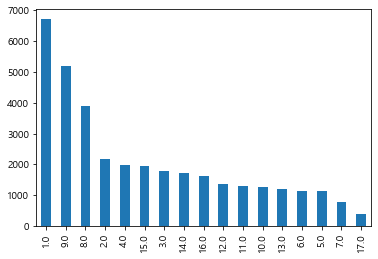

In [10]:
_=df_info["region"].value_counts().sort_values(ascending=False).plot.bar()

서울에서 가장 많이 조사하고, 제주에서 가장 적게 조사함을 알 수 있다. 서울, 세종, 경기가 많고, 제주가 적다. 나머지는 엇비슷하다.

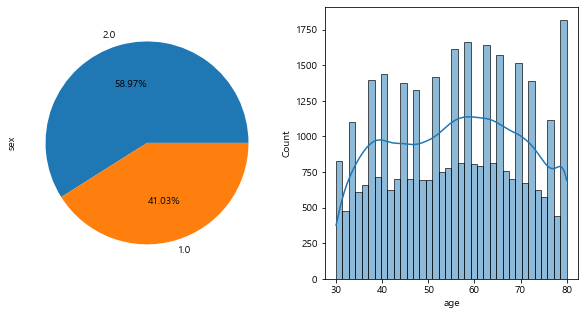

In [11]:
fig, ax=plt.subplots(1, 2, figsize=(10, 5))
ax=ax.flatten()

_=df_info["sex"].value_counts().plot.pie(ax=ax[0], autopct="%.2f%%")
_=sns.histplot(data=df_info, x="age", ax=ax[1], kde=True)

In [12]:
df_info["age"].median()

56.0

In [13]:
df_info["age"].mean()

55.918353027028544

In [14]:
df_info["age"].skew() # 음의 왜도

-0.03892473684371937

* 여자가 남자보다 많다. (약 17% 더 많다.)
* 완벽한 정규 분포는 아니고, 군데군데 많은 나이대가 있다. (30세 ~ 80세) 80세가 가장 많은 분포를 차지한다. (80세가 가장 많다.)
* 55세 이하인 경우는 17078명이고, 56세 이상인 경우는 18551명이다. 
* 평균 < 중앙값 < 최빈값 : 음의 왜도, 오른쪽으로 쏠려있는 모양이다.

In [15]:
# 사용자 함수 : age_type
def age_type(x):
    if x<40:
        return "30~39"
    elif x<50:
        return "40~49"
    elif x<60:
        return "50~59"
    elif x<70:
        return "60~69"
    elif x<80:
        return "70~79"
    else:
        return "80"

In [16]:
# 데이터프레임["열"].apply(사용자 함수)
df_info["age_type"]=df_info["age"].apply(age_type)

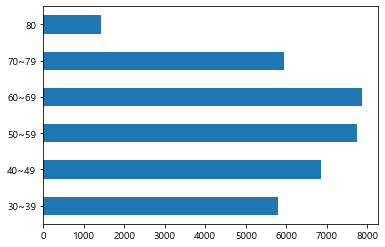

In [17]:
_=df_info["age_type"].value_counts().sort_index().plot.barh()

청년보다 나이드신 사람들이 많이 설문조사에 응하였다. (나이가 많은 사람들이 많으니, 질병이 많을 확률도 높을 가능성도 있을 것 같다.)

In [18]:
df_info["allownc"]=df_info["allownc"].map({10:"있음", 20:"없음", -2:"알 수 없음"})

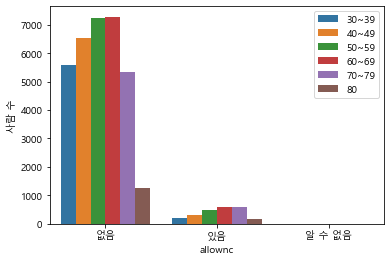

In [19]:
df_allownc=df_info[["age_type", "allownc"]].groupby(["age_type", "allownc"]).size().reset_index()
fig=sns.barplot(data=df_allownc, x="allownc", y=0, hue="age_type")
fig.set_ylabel("사람 수")
_=fig.legend(loc="upper right")

거의 모두 기초생활수급자에 해당되지 않는다. 알 수 없음은 극히 적음.

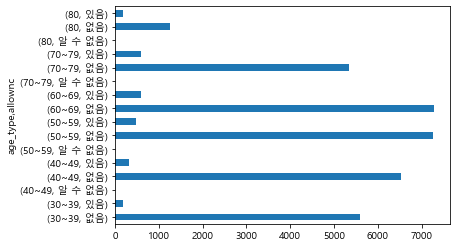

In [20]:
_=df_info[["age_type", "allownc"]].groupby(["age_type", "allownc"]).size().plot.barh()

80세인 경우에 기초생활수급을 받는 비율이 다른 나이대에 비하여 높다. 그 외에는 거의 받지 않음. (서울, 경기, 세종이 대체로 잘 사는 지역이라서 낮은 비율을 차지할 가능성 존재할 수 있음.)

In [21]:
df_recogn=df_info[["allownc", "D_1_1"]].groupby(["allownc", "D_1_1"]).size()

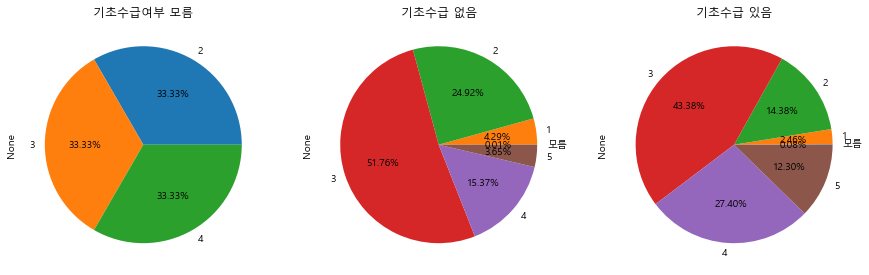

In [22]:
fig, ax=plt.subplots(1, 3, figsize=(15,5))
ax=ax.flatten()
label=["2", "3", "4"]
labels=["모름", "1", "2", "3", "4", "5"]

_=df_recogn[:3].plot.pie(y=0, ax=ax[0], autopct="%.2f%%", labels=label)
_=ax[0].set_title("기초수급여부 모름")
_=df_recogn[3:9].plot.pie(y=0, ax=ax[1], autopct="%.2f%%", labels=labels)
_=ax[1].set_title("기초수급 없음")
_=df_recogn[9:].plot.pie(y=0, ax=ax[2], autopct="%.2f%%", labels=labels)
_=ax[2].set_title("기초수급 있음")

* 주관적 건강인지가 매우 좋은 경우와 좋은 경우는 기초수급 없는 경우보다 있는 경우 약 2배 정도 더 많이 차지한다. (좀 더 부유하니 건강인지할 여유가 더 높다.)
* 기초수급 있는 경우는 나쁨과 매우 나쁨이 없는 경우보다 훨씬 많이 차지한다. (특히 매우 나쁨은 약 3~4배 정도 높음.)

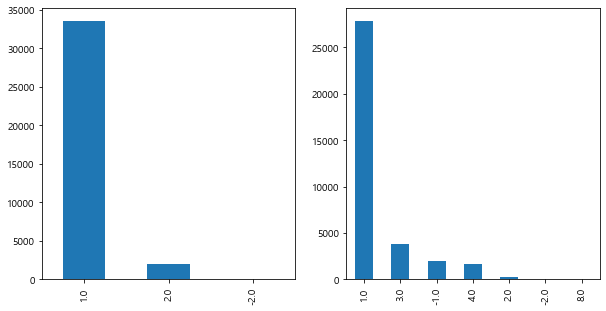

In [23]:
fig, ax=plt.subplots(1, 2, figsize=(10,5))
ax=ax.flatten()

_=df_info["marri_1"].value_counts().plot.bar(ax=ax[0])
_=df_info["marri_2"].value_counts().plot.bar(ax=ax[1])

기혼이고 동거인 경우가 압도적으로 많음.

In [24]:
df_rel=df_info[["fam_rela", "age_type", "tins"]].groupby(["fam_rela", "age_type"])["tins"].count().reset_index()

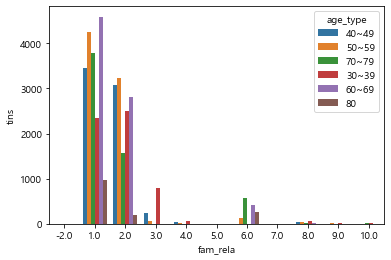

In [25]:
_=sns.barplot(data=df_rel, x="fam_rela", y="tins", hue="age_type")

* 실질적 생계 책임자가 가장 많이 조사에 응하고 그 다음으로 배우자가 가장 많음. (본인 > 배우자 > 부모 > 자식)
* 본인은 50대, 60대가 많고, 배우자는 40대, 50대가 많다. 그리고 부모는 60대, 70대가 많고 자녀는 대부분 30대이다.
* 80세는 실질적 경제 책임자인 경우가 가장 많음.
* 따라서 실질적인 경제 책임자가 본인인 경우가 많고, 나이대가 있는 사람들로 많이 구성된 편. (나이 많으면서 실질적인 경제 책임자가 조사에 응한 경우가 많음.)

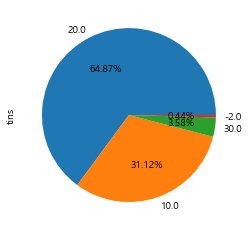

In [26]:
_=df_info["tins"].value_counts().plot.pie(autopct="%.2f%%")

직장 국민건강보험이 지역 국민건강보다 2배 이상 더 차지함. 그리고 의료급여는 전체의 약 3%만 차지함. (대부분의 경우가 직장을 다니고 있다.)

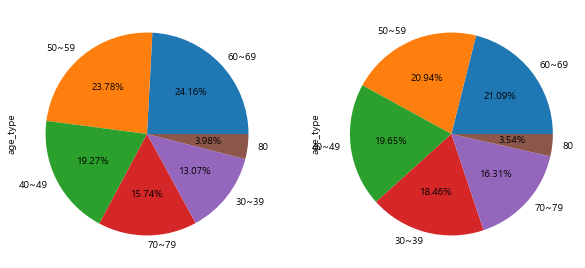

In [27]:
fig, ax=plt.subplots(1, 2, figsize=(10, 5))
ax=ax.flatten()

df_region=df_info.loc[df_info["tins"]==10.0]
df_comp=df_info.loc[df_info["tins"]==20.0]

_=df_region["age_type"].value_counts().plot.pie(ax=ax[0], autopct="%.2f%%")
_=df_comp["age_type"].value_counts().plot.pie(ax=ax[1], autopct="%.2f%%")

* 60대 > 50대 > 40대
* 지역 국민건강보험인 경우는 30대 < 70대이고, 직장 국민건강보험인 경우는 30대 > 70대이다. (약 2% 차이) 
* 80세는 둘다 약 3% 차지함.

In [28]:
df_80=df_info[df_info["age"]==80]

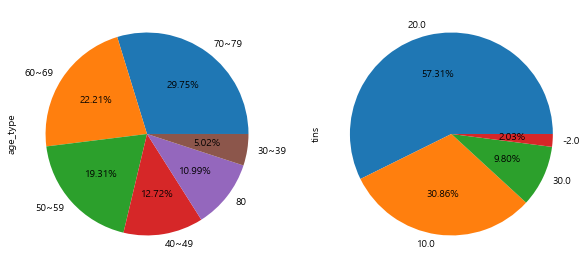

In [29]:
fig, ax=plt.subplots(1, 2, figsize=(10, 5))
ax=ax.flatten()

# 의료급여인 경우 나이대의 분포
_=df_info.loc[df_info["tins"]==30.0, "age_type"].value_counts().plot.pie(autopct="%.2f%%", ax=ax[0])

# 나이 80세인 경우, 건강보험종류의 분포
_=df_80["tins"].value_counts().plot.pie(autopct="%.2f%%", ax=ax[1])

In [30]:
df_info[["cfam", "age"]]. groupby(["cfam"])["age"].mean()

cfam
1.0    64.188156
2.0    62.865902
3.0    52.241001
4.0    46.866804
5.0    49.662661
6.0    53.139024
Name: age, dtype: float64

In [31]:
df_info[["cfam", "age"]]. groupby(["cfam"])["age"].median()

cfam
1.0    68.0
2.0    65.0
3.0    52.0
4.0    45.0
5.0    46.0
6.0    51.0
Name: age, dtype: float64

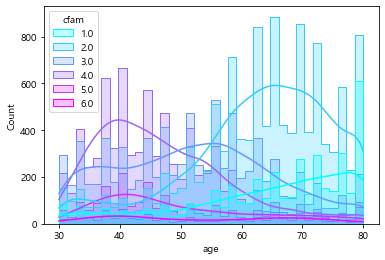

In [32]:
_=sns.histplot(df_info, x="age", hue="cfam", kde=True, 
               element="step", palette="cool")

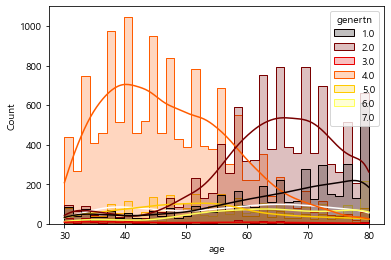

In [33]:
_=sns.histplot(df_info, x="age", hue="genertn", kde=True, 
               element="step", palette="hot")

* 혼자 사는 경우와 부부끼리 사는 경우는 나이가 많은 경우가 많다.
* 부부와 미혼자녀가 사는 경우에는 나이가 젊은 경우가 많다.

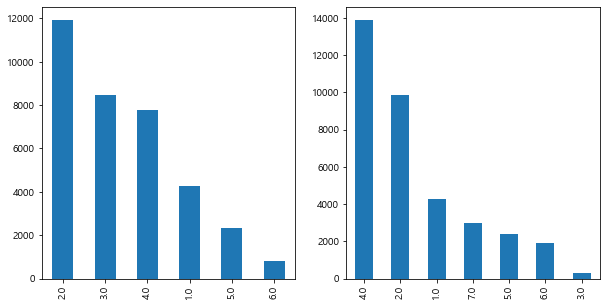

In [34]:
fig, ax=plt.subplots(1, 2, figsize=(10,5))
ax=ax.flatten()

_=df_info["cfam"].value_counts().plot.bar(ax=ax[0])
_=df_info["genertn"].value_counts().plot.bar(ax=ax[1])

* 부부와 미혼 자녀의 형태가 가장 많다.
* 혼자 사는 경우는 독거 노인이 많고, 둘이 사는 경우는 노부부인 경우가 많고, 부부와 미혼 자녀가 사는 경우는 나이가 젊은 경우가 많다.

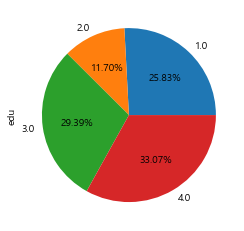

In [35]:
_=df_info["edu"].value_counts().sort_index().plot.pie(autopct="%.2f%%")

대졸이상 > 고졸 > 초졸이하 > 중졸

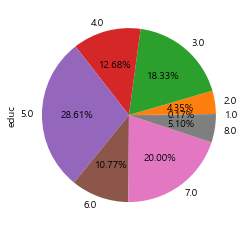

In [36]:
_=df_info["educ"].value_counts().sort_index().plot.pie(autopct="%.2f%%")

고졸이 많은 편이다.

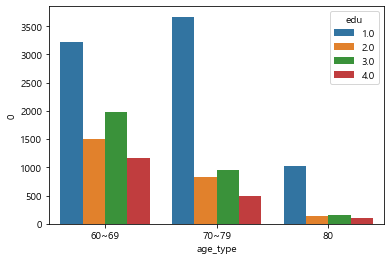

In [37]:
senior_cond=((df_info["age_type"]=="60~69") | (df_info["age_type"]=="70~79") | (df_info["age_type"]=="80"))
df_senior=df_info.loc[senior_cond, :]
df_senior_groupby=df_senior[["age_type", "edu"]].groupby(["age_type", "edu"]).size().reset_index()
_=sns.barplot(data=df_senior_groupby, x="age_type", y=0, hue="edu")

노인 (60대 ~ 80세) 들이 초졸 이하가 많아서 초졸 이하인 비율 높아짐.

In [38]:
df_work=df_info[df_info["EC1_1"]==1]
# 근로시간과 변형근로시간이 양수여야 한다.
df_work=df_work[(df_work["EC_wht_5"]>0) & (df_work["EC_wht_23"]>0)]

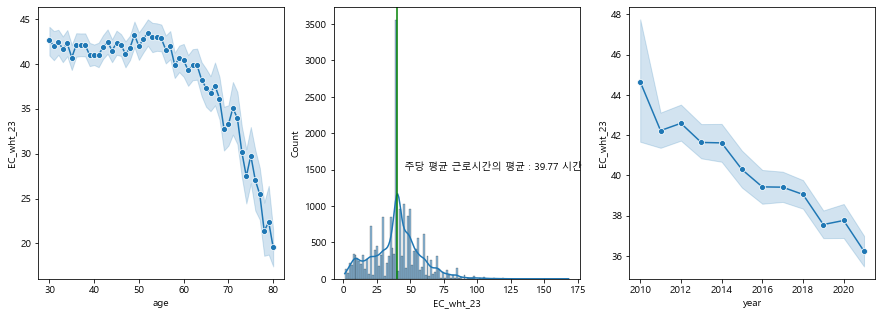

In [39]:
fig, ax=plt.subplots(1,3, figsize=(15,5))
ax=ax.flatten()

_=sns.lineplot(data=df_work, x="age", y="EC_wht_23", marker="o", ax=ax[0])
_=sns.histplot(data=df_work, x="EC_wht_23", kde=True, ax=ax[1])
_=ax[1].axvline(x=df_work["EC_wht_23"].values.mean(), color="green")
_=ax[1].text(x=df_work["EC_wht_23"].values.mean()+3, y=1500, s=f' 주당 평균 근로시간의 평균 : {round(df_work["EC_wht_23"].values.mean(), 2)} 시간', color="black")
_=sns.lineplot(data=df_work, x="year", y="EC_wht_23", marker="o", ax=ax[2])

In [40]:
df_work["EC_wht_23"].max()

168.0

In [41]:
df_work["EC_wht_23"].min()

1.0

나이가 들어감에 따라 주당 평균 근로시간이 70세 ~ 80세 사이에서 급격하게 떨어지고, 주당 평균 근로시간의 평균은 약 40시간 정도 되며, 최소 시간은 0시간, 최대 시간은 168시간이다. 그리고 매년 지날 수록 주당 평균 근로시간이 낮아지고 있다. (2010 ~ 2011, 2020 ~ 2021에 급격하게 떨어짐.)

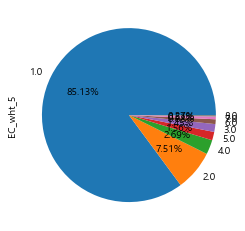

In [42]:
_=df_work["EC_wht_5"].value_counts().plot.pie(autopct="%.2f%%")

주간 근무와 저녁 근무가 약 93% 차지한다.

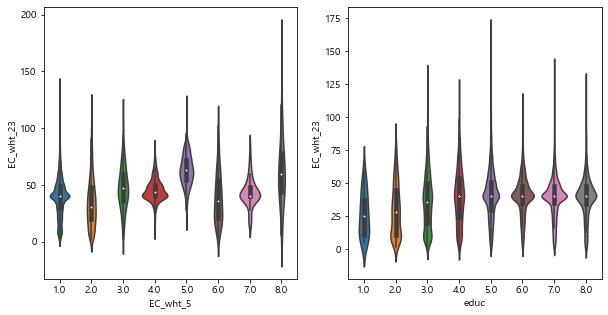

In [43]:
fig, ax=plt.subplots(1, 2, figsize=(10, 5))
ax=ax.flatten()

_=sns.violinplot(data=df_work, x="EC_wht_5", y="EC_wht_23", ax=ax[0])
_=sns.violinplot(data=df_work, x="educ", y="EC_wht_23", ax=ax[1])

* 24시간 교대근무하는 경우에 주당 평균 근로시간의 평균이 가장 높다. 기타는 주당 평균 근로시간의 분포가 가장 넓다. (기타가 무엇일까?)
* 무학 > 서당 > 초졸이하로 갈 수록 평균 근로시간의 평균이 높아지지만, 중졸이하부터는 비슷하다. (교육받은 양에 따라서 주당 평균에 영향을 주지는 않는 듯하다. 하지만 고졸이하가 가장 분포가 넓다. 다양하게 분포.)

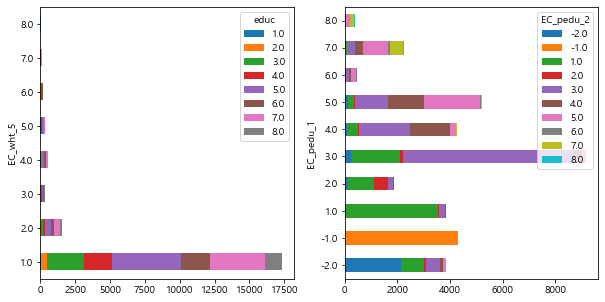

In [44]:
fig, ax=plt.subplots(1, 2, figsize=(10,5))
ax=ax.flatten()

_=df_work[["EC_wht_5", "educ"]].groupby(["EC_wht_5", "educ"]).size().unstack().plot.barh(stacked=True, ax=ax[0])
_=df_info[["EC_pedu_1", "EC_pedu_2"]].groupby(["EC_pedu_1", "EC_pedu_2"]).size().unstack().plot.barh(stacked=True, ax=ax[1])

주간근무과 저녁근무에서 고졸이나 4년제 대학 비율이 많음. 대부분의 경우도 고졸과 4년제 대학 비율이 많음. 그리고 아버지는 아버지 교육수준과 같은 어머니를 만나거나 더 낮은 교육수준의 어머니를 만나서 결혼함.

In [45]:
df_edu=df_info[["EC_pedu_1","EC_pedu_2","educ"]].groupby(["EC_pedu_1","EC_pedu_2", "educ"]).size().reset_index()

In [46]:
df_edu.columns=["EC_pedu_1", "EC_pedu_2", "educ", "count"]

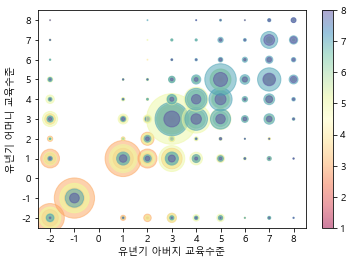

In [47]:
_=plt.scatter(data=df_edu, x="EC_pedu_1", y="EC_pedu_2", s="count", c="educ", cmap='Spectral', alpha=0.5)
_=plt.colorbar()
_=plt.xticks([-2, -1, 0, 1, 2, 3, 4, 5, 6 ,7, 8])
_=plt.yticks([-2, -1, 0, 1, 2, 3, 4, 5, 6 ,7, 8])
_=plt.xlabel("유년기 아버지 교육수준")
_=plt.ylabel("유년기 어머니 교육수준")

어머니, 아버지 교육수준이 높을수록 자녀의 학력이 높아지는 경향을 보인다?

In [48]:
df_edu_class=df_info[["EC_pedu_1","EC_pedu_2","edu"]].groupby(["EC_pedu_1","EC_pedu_2", "edu"]).size().reset_index()
df_edu_class.columns=["EC_pedu_1", "EC_pedu_2", "edu", "count"]

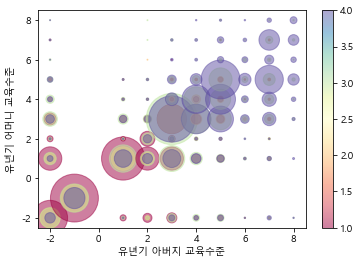

In [49]:
_=plt.scatter(data=df_edu_class, x="EC_pedu_1", y="EC_pedu_2", s="count", c="edu", cmap='Spectral', alpha=0.5)
_=plt.colorbar()
#_=plt.xticks([-2, -1, 0, 1, 2, 3, 4, 5, 6 ,7, 8])
#_=plt.yticks([-2, -1, 0, 1, 2, 3, 4, 5, 6 ,7, 8])
_=plt.xlabel("유년기 아버지 교육수준")
_=plt.ylabel("유년기 어머니 교육수준")

어머니, 아버지 교육수준이 높을수록 자녀의 학력이 높아지는 경향을 보인다.

In [50]:
df_multi=df_work.loc[df_work["D_1_1"]>=0, ["D_1_1", "EC_wht_5"]].groupby(["D_1_1", "EC_wht_5"]).size().unstack()
df_multi

EC_wht_5,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0
D_1_1,,,,,,,,
1.0,781.0,70.0,15.0,25.0,21.0,10.0,6.0,3.0
2.0,4768.0,438.0,64.0,159.0,82.0,37.0,29.0,14.0
3.0,9078.0,774.0,168.0,301.0,180.0,96.0,54.0,34.0
4.0,2329.0,221.0,46.0,58.0,29.0,29.0,14.0,3.0
5.0,382.0,27.0,3.0,5.0,5.0,8.0,NaN,1.0


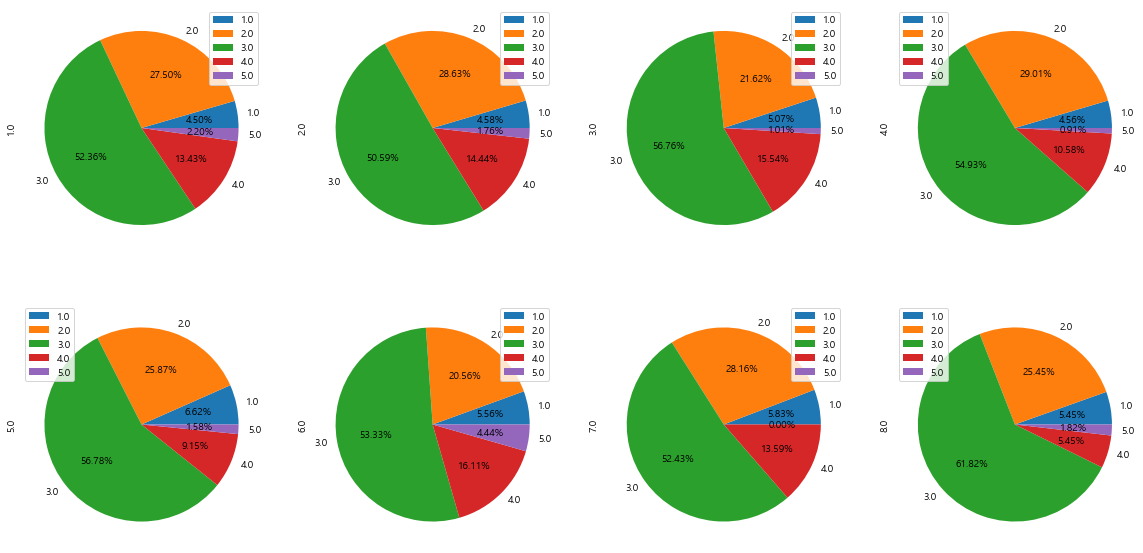

In [51]:
fig, ax=plt.subplots(2, 4, figsize=(20, 10))
ax=ax.flatten()

for idx, col_name in enumerate (df_multi.columns):
    # print(idx, col_name)
    _=df_multi.plot.pie(y=col_name, autopct="%.2f%%", ax=ax[idx])

* 분할근무 할 때 주관적 건강인지가 가장 안 좋은 비율이 많다.
* 불규칙 교대근무 시에는 주관적 건강인지 매우 나쁨이 0% 이다. (의외의 결과)
* 주야간 규칙적 교대근무에서도 주관적 건강인지 매우 나쁨이 1%도 되지 않는다. (규칙적이라 그런가?)
* 24시간 교대근무에서 건강인지가 가장 높은 편에 속한다. (약 7%)

* 주야간 규칙적 교대근무
* 24시간 교대근무 : 24시간 일하고, 24시간 쉼.
* 분할근무 :보수가 지급되지 않는 중간 휴식시간을 가짐.

In [52]:
cond=((df_info["BD1_11"]!=-1) & (df_info["BD2_1"]!=-1) & (df_info["BD2_31"]!=-1))
# 음주 해당되지 않는 사람 다 빼기.
df_drink=df_info[cond]

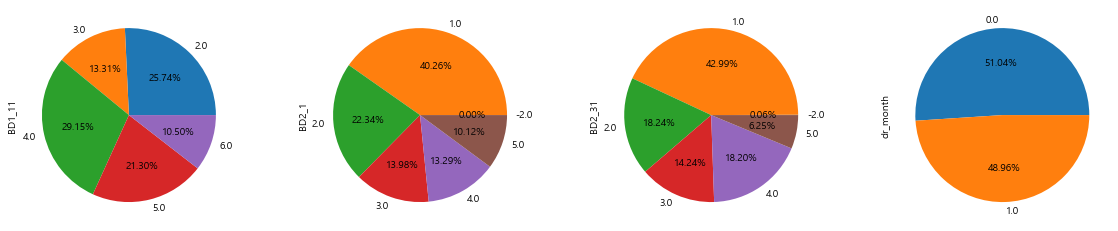

In [53]:
fig, ax=plt.subplots(1, 4, figsize=(20, 4))
ax=ax.flatten()

for idx, col_name in enumerate(["BD1_11", "BD2_1", "BD2_31"]):
    _=df_drink[col_name].value_counts().sort_index().plot.pie(ax=ax[idx], autopct="%.2f%%")
_=df_info["dr_month"].value_counts().sort_index().plot.pie(ax=ax[3], autopct="%.2f%%")

* 전혀 안 마시거나, 월 1회 미만이 비슷하고 월 2~4회가 가장 많다.
* 설령 마시더라고 1~2잔이 가장 많다. 
* 폭음 빈도도 거의 전혀 없다. 하지만 월 1회 미만이나 주 1회 정도가 약 20%를 차지한다. (조금씩 자주 마시는 사람 꽤 있음.)
* 비음주와 음주가 비슷하다. 월간 음주하는 비율은 전체 약 50% 정도 된다.

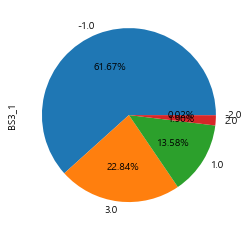

In [54]:
_=df_info["BS3_1"].value_counts().plot.pie(autopct="%.2f%%") # -1 : 비흡연자 의미.

* 비흡연자가 많다. 그리고 과거에 피웠다가 현재 피우지 않는 사람들은 약 23%정도 된다. (이 사람들이 질병이 있는지 파악해볼 필요성 있음.)
* 매일 피는 사람 약 13%이다.

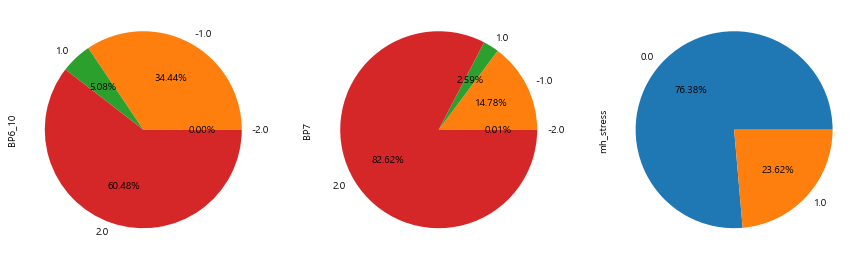

In [55]:
fig, ax=plt.subplots(1, 3, figsize=(15, 5))
ax=ax.flatten()

for idx, col_name in enumerate(["BP6_10", "BP7", "mh_stress"]):
    df_info[col_name].value_counts().sort_index().plot.pie(autopct="%.2f%%", ax=ax[idx])

자살생각, 자살문제 상담 거의 안 함. 그리고 스트레스 인지 적은 편이다.

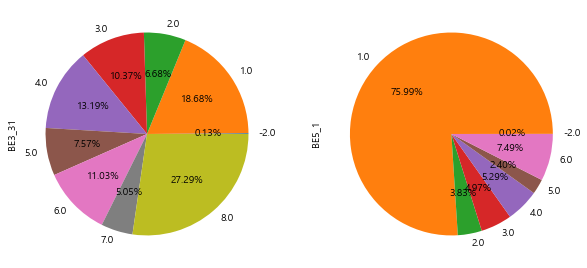

In [56]:
fig, ax=plt.subplots(1, 2, figsize=(10, 5))
ax=ax.flatten()

for idx, col_name in enumerate(["BE3_31", "BE5_1"]):
    df_info[col_name].value_counts().sort_index().plot.pie(autopct="%.2f%%", ax=ax[idx])

* 매일 걷는 사람들의 비율이 가장 높다. (약 27%) 그리고 전혀 운동 안 하는 경우도 18% 정도 차지한다. (생각보다 걷지도 않는 사람들 많음.)
* 그런데 근력 운동을 하지 않는 사람들이 76% 정도 된다. (뭔가 병에 걸리지 않았을까?)

In [57]:
df_women=df_info.loc[df_info["sex"]==2]

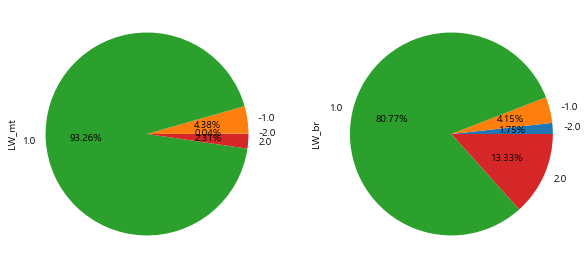

In [58]:
fig, ax=plt.subplots(1, 2, figsize=(10, 5))
ax=ax.flatten()

for idx, col_name in enumerate(["LW_mt", "LW_br"]):
    df_women[col_name].value_counts().sort_index().plot.pie(autopct="%.2f%%", ax=ax[idx])

* 출산 경험이 약 93% 정도 차지한다.
* 모유수유 경험이 있는 여성이 약 80% 차지한다.

In [59]:
df_copy.loc[((df_copy["sex"]==2) & (df_copy["LW_mt"]==2)) , ["HE_mens", "HE_prg"]].groupby(["HE_mens", "HE_prg"]).size()

HE_mens  HE_prg
0.0      0.0       467
1.0      0.0        19
dtype: int64

In [60]:
df_copy.loc[((df_copy["sex"]==2) & (df_copy["LW_mt"]==2)), "age"].sort_values().unique()

array([30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42.,
       43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55.,
       56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68.,
       69., 70., 71., 72., 73., 74., 75., 76., 77., 79., 80.])

In [61]:
df_copy.loc[((df_copy["sex"]==2) & (df_copy["LW_br"]==2)) , ["HE_mens", "HE_prg"]].groupby(["HE_mens", "HE_prg"]).size()

HE_mens  HE_prg
0.0      0.0       2727
1.0      0.0         74
dtype: int64

* 출산 경험이 없는 여성들 중에서 생리를 하지 못하는 경우가 467명 있음.
* 모유 수유 경험 없는 경우는 출산을 안 한 경우이다.

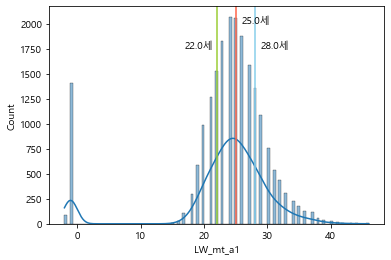

In [62]:
fig=sns.histplot(df_women["LW_mt_a1"], kde=True)
q1=df_women["LW_mt_a1"].quantile(0.25) #q1
q2=df_women["LW_mt_a1"].median() # q2
q3=df_women["LW_mt_a1"].quantile(0.75) # q3

_=fig.axvline(x=q2, color="tomato")
_=fig.text(x=q2+1, y=2000, s=f"{q2}세")
_=fig.axvline(x=q1, color="yellowgreen")
_=fig.text(x=q1-5, y=1750, s=f"{q1}세")
_=fig.axvline(x=q3, color="skyblue")
_=fig.text(x=q3+1, y=1750, s=f"{q3}세")

첫 출산 연령 분포에서 25%가 22세, 50%가 25세, 75%가 28세이다.

**기본정보에 대한 정리**

1. 시 : 서울 > 경기 > 세종 (수도권 밀집)
2. 성별 : 여자 > 남자
3. 나이 : 오른쪽으로 쏠려있음 (평균 < 중앙값 < 최빈값), 나이 많은 사람들이 많이 조사에 응하는 편.
4. 기초수급자 : 거의 없지만 나이 많을수록  기초 수급자일 가능성 높음. 80세가 가장 많음. 받지 않는 사람들은 받는 사람들보다 주관적 건강인지 잘 되는 편. (매우 좋음은 약 2배 정도, 매우 나쁨은 약 3~4배 정도)
5. 실질적인 경제 책임자(본인)가 조사에 많이 응하고, 나이가 대체로 많음. (50대 ~ 60대)
6. 직장 국민건강보험이 지역 국민건강보험의 약 2배. 나이 많을수록 보험 가입 비율 높은 편. 나이 어릴수록 직장 국민건강보험을 들고, 나이 많을수록 지역 국민건강보험 드는 편.
7. 부부와 미혼 자녀의 형태가 가장 많다. 그리고 혼자 사는 경우는 독거 노인이 많고, 둘이 사는 경우는 노부부인 경우가 많고, 부부와 미혼 자녀가 사는 경우는 나이가 젊은 경우가 많다.
8. 학력은 고졸 > 대졸 이상 (2,3,4년제, 대학원), 초졸이 생각보다 많은 이유는 노인들이 초졸인 경우가 많아서.
9. 주간, 저녁 근무가 전체 93% 차지.
10. 24시간 교대근무가 주당 평균 근로시간 가장 높고, 중학교부터 대학원까지 주당 평균 근로시간의 평균 비슷.
11. 엄마, 아빠 유년기 교육 수준이 자녀의 교육 수준에 영향 미침.
12. 주당 평균 근로시간의 평균은 약 40시간, 나이 들수록 급격하게 하락 (특히 70 ~ 80세), 최소는 1시간, 최대는 168시간. 그리고 연도가 지날수록 하락한다. (2010 > 2011, 2020 > 2021로 갈 때 특히 급격하게 하락.)
13. 대부분의 변형시간 근무에서 고졸과 4년제 대학 졸업이 많다. 그리고 아버지 교육수준은 어머니와 비슷하거나 좀 더 높은 경우가 많음.
14. 분할근무 시 주관적 건강인지 매우 나쁨이 가장 많이 나옴.
15. 불규칙 교대근무 시 주관적 건강인지 매우 나쁨이 0%가 나옴. 
16. 주야간 규칙적 교대근무 시 주관적 건강인지 매우 나쁨이 1% 미만으로 나옴.
17. 24시간 교대근무 시 주관적 건강인지 매우 좋음이 가장 많음.
18. 음주는 조금씩 자주 마시는 사람이 좀 있어보임. 하지만 대체로 음주가는 없다.
19. 정신건강은 거의 건강. 스트레스 인지도 적은 편. (행복한 사람 많은 듯)
20. 담배는 거의 비흡연자. 담배를 피우다가 지금은 안 피는 비율은 23% 정도 차지.
21. 근력 운동은 아예 안 하는 사람 많음. 매일 걷기를 하는 사람도 많지만, 전혀 안 하는 사람도 많음.
22. 출산 경험과 모유 수유한 여성 대부분이다. 모유 수유를 하지 않은 경우는 출산하지 않은 여성들이다. 출산하지 않은 여성들 중에서 생리를 하지 않는 여성들이 있다.